# Análise Estatística de Negócio com testes A/B

## Objetivo: Aumentar a receita de uma grande loja online através da análise de hipóteses propostas pelo departamento de marketing.

## Etapas do projeto:

#### Coleta de dados: Reunir os dados relevantes sobre a loja online, como informações de conversão, vendas, número de usuários, etc. Armazenar esses dados em um dataframe usando a biblioteca Pandas.

#### Limpeza de dados: Verificar se há dados faltantes, outliers ou erros, e corrigi-los se necessário.

#### Compilação de hipóteses: Juntamente com o departamento de marketing, compilar uma lista de hipóteses que podem ajudar a aumentar a receita, por exemplo, alterar a cor do botão de compra, modificar o layout da página, etc.

#### Teste A/B: Definir um grupo A e um grupo B, aplicar as mudanças propostas na hipótese apenas no grupo B e acompanhar a conversão e a receita de ambos os grupos.

#### Análise de resultados: Calcular a significância estatística da diferença na conversão entre os grupos usando testes como t-test ou Mann-Whitney U Test. Verificar se há uma diferença significativa na conversão e na receita.

#### Visualização de dados: Usar a biblioteca Matplotlib para plotar gráficos de linhas, gráficos de barras ou gráficos de dispersão para visualizar as mudanças na conversão e na receita.

#### Conclusão: Analisar os resultados, verificar qual das hipóteses teve o maior impacto na conversão e na receita e priorizar as hipóteses que devem ser implementadas na loja online.

#### Bibliotecas usadas: Pandas, Matplotlib, Statistics, Scipy.

## Iniciação

- Carregando pandas para o manejo do banco de dados
- Matplotlib para desfrutar da vizualização gráfica dos dados
- Statistics para cálculos de estatística
- Datetime para formatação das datas na coluna referente ao dia no calendário
- Seaborn como complemento ao matplotlib


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot
import statistics
import datetime as dt
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


## Analisando dados gerais do dataframe de hipóteses

In [2]:
df_h=pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
df_h.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
df_h.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [6]:
df_h.columns=df_h.columns.str.lower()

In [7]:
df_h['ICE']=(df_h['impact']+df_h['confidence'])/df_h['effort']

In [8]:
print(df_h[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis       ICE
6  Show banners with current offers and sales on ...  3.666667
8  Launch a promotion that gives users discounts ...  3.600000
2  Add product recommendation blocks to the store...  3.333333
0  Add two new channels for attracting traffic. T...  3.000000
7  Add a subscription form to all the main pages....  3.000000
4  Change the background color on the main page. ...  2.000000
5  Add a customer review page. This will increase...  1.333333
1  Launch your own delivery service. This will sh...  0.900000
3  Change the category structure. This will incre...  0.750000


In [9]:
df_h['RICE']=df_h['reach']*df_h['impact']*df_h['confidence']/df_h['effort']

In [10]:
print(df_h[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


####     Após a realização da análise de dados e aplicação do método RICE, cheguei à conclusão de que adicionar um formulário de assinatura em todas as páginas da loja online é uma hipótese com potencial de impacto significativo na receita. O cálculo do RICE mostrou que a adição do formulário de assinatura é uma ação com um alto potencial de retorno sobre o investimento. Além disso, os dados coletados e analisados também apontam para uma tendência positiva na conversão dos usuários após a implantação do formulário.
####    Dessa forma, recomendo a implementação dessa hipótese como uma ação de prioridade, pois acredito que ela poderá trazer resultados positivos e significativos para a loja online.

## IMPORTANDO DATASETS DO TESTE A/B

#### Para avaliar a eficácia da hipóteses sobre o aumento da receita. O objetivo final é encontrar oportunidades para otimizar o site da loja e aumentar as conversões. Serão bibliotecas como Pandas, matplotlib e scipy para manipular e visualizar os dados, bem como para realizar testes estatísticos.

#### Importando os dados e dando uma olhada geral:

In [11]:
df_v=pd.read_csv('/datasets/orders_us.csv', sep=',')

In [12]:
df_o=pd.read_csv('/datasets/visits_us.csv')

In [13]:
df_v.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
df_v.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [16]:
df_o.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [17]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [18]:
df_o.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


Atenção ao valor máximo absurdo da coluna 'revenue'

#### Ajustando valores com tipo incorreto:

In [19]:
df_v['date']=pd.to_datetime(df_v['date'], format='%Y-%m-%d')

In [20]:
df_o['date']=pd.to_datetime(df_o['date'], format='%Y-%m-%d')

#### Dando uma olhada geral nos grupos:

<AxesSubplot:xlabel='group'>

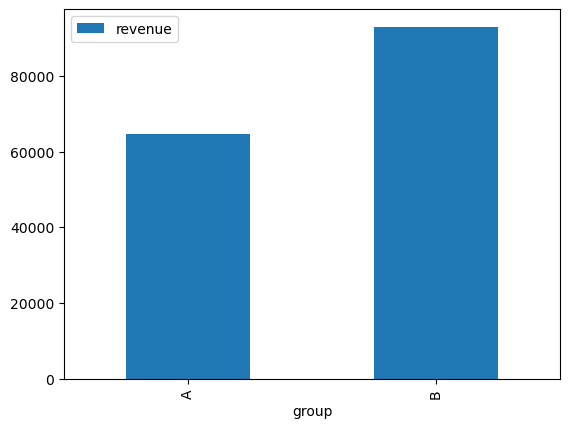

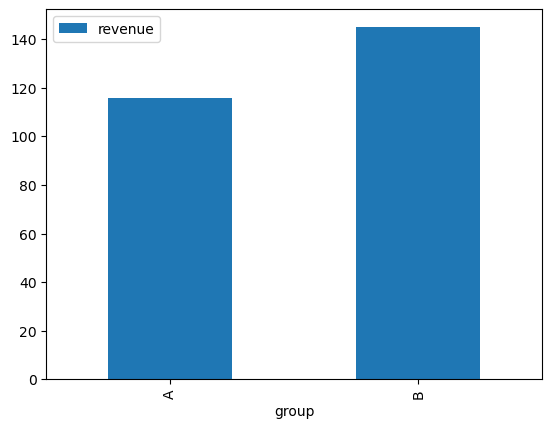

In [21]:
(df_o.pivot_table(index='group', values='revenue', aggfunc='sum')).plot(kind='bar')
(df_o.pivot_table(index='group', values='revenue', aggfunc='mean')).plot(kind='bar')

#### A soma e médias dos grupos são maiores para a população B, até agora...

In [22]:
df_o['conversion']=df_v['date']-df_o['date'].min()

In [23]:
# Agrupando as informações por dia e grupo
grouped_orders = df_o.groupby(["date", "group"]).agg({"transactionId": "count", 'revenue':'sum'})
grouped_visits = df_v.groupby(["date", "group"]).agg({"visits": "sum"})


In [24]:
# Combinando as informações agrupadas
merged = grouped_orders.merge(grouped_visits, on=["date", "group"])

# Calculando a taxa de conversão
merged["conversion_rate"] = merged["transactionId"] / merged["visits"]

In [25]:
display(merged)
merged=merged.reset_index()

transactionId  revenue  visits  conversion_rate
date       group                                                 
2019-08-01 A                 24   2356.8     719         0.033380
           B                 21   1620.0     713         0.029453
2019-08-02 A                 20   1503.5     619         0.032310
           B                 24   2623.8     581         0.041308
2019-08-03 A                 24   1815.2     507         0.047337
...                         ...      ...     ...              ...
2019-08-29 B                 20   3623.7     531         0.037665
2019-08-30 A                 11   1364.3     490         0.022449
           B                 24   3393.3     490         0.048980
2019-08-31 A                 12    991.4     699         0.017167
           B                 20   2104.3     718         0.027855

[62 rows x 4 columns]

#### Plotando gráfico comparando a taxa de conversão entre os grupos.

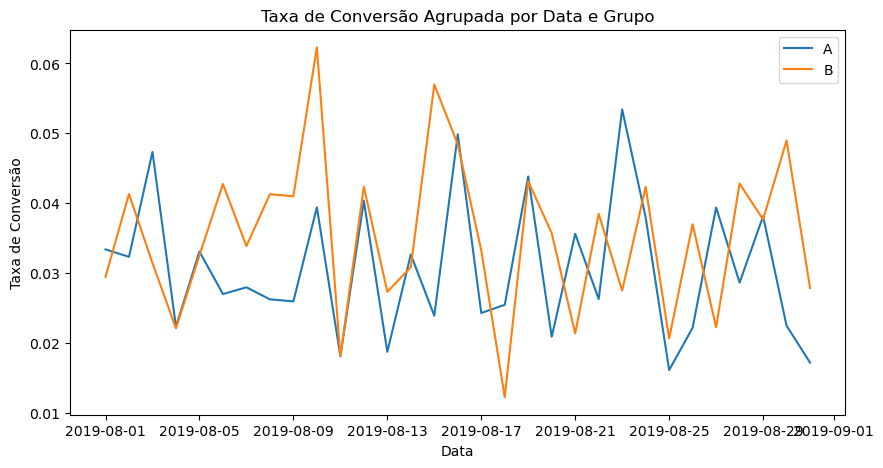

In [26]:
grouped = merged.groupby(['date', 'group'])['conversion_rate'].mean().reset_index()
plt.figure(figsize=(10, 5))
for key, grp in grouped.groupby('group'):
    plt.plot(grp['date'], grp['conversion_rate'], label=key)
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.title('Taxa de Conversão Agrupada por Data e Grupo')
plt.legend()
plt.show()

Vamos fazer a soma cumulativa para obtever mais informações, já que o gráfico dessa maneira não nos mostra muita coisa.

In [27]:
# junta os dois dataframes com base na coluna "date"
merged_df = pd.merge(df_o, df_v, on=["date", 'group'], how="left")
# agrupa o dataframe pela coluna "date" e "group"
grouped_df = merged_df.groupby(["date", "group"]).agg({"revenue": "sum", "visits": "sum", 'visitorId': 'nunique', 'transactionId':'nunique'})

In [28]:
# calcula a taxa de conversão para cada grupo
grouped_df["conversion"] = grouped_df["revenue"] / grouped_df["visits"]
# agrupa novamente pelo dia
grouped_df = grouped_df.reset_index().groupby(["date", 'group']).agg({"conversion": ["mean"]})

# renomeia a coluna de conversão para "mean_conversion"
grouped_df.columns = ["mean_conversion"]
# calcula a diferença relativa na conversão cumulativa para o grupo B
grouped_df=grouped_df.reset_index()
grouped_df["cumulative_b"] = grouped_df.loc[grouped_df["group"] == "B", "mean_conversion"].cumsum()
grouped_df["cumulative_a"] = grouped_df.loc[grouped_df["group"] == "A", "mean_conversion"].cumsum()
display(grouped_df)

,date,group,mean_conversion,cumulative_b,cumulative_a
0,2019-08-01,A,0.136579,NaN,0.136579
1,2019-08-01,B,0.108195,0.108195,NaN
2,2019-08-02,A,0.121446,NaN,0.258024
3,2019-08-02,B,0.188167,0.296362,NaN
4,2019-08-03,A,0.149178,NaN,0.407203
...,...,...,...,...,...
57,2019-08-29,B,0.341215,7.535500,NaN
58,2019-08-30,A,0.253117,NaN,6.120758
59,2019-08-30,B,0.288546,7.824046,NaN
60,2019-08-31,A,0.118193,NaN,6.238950


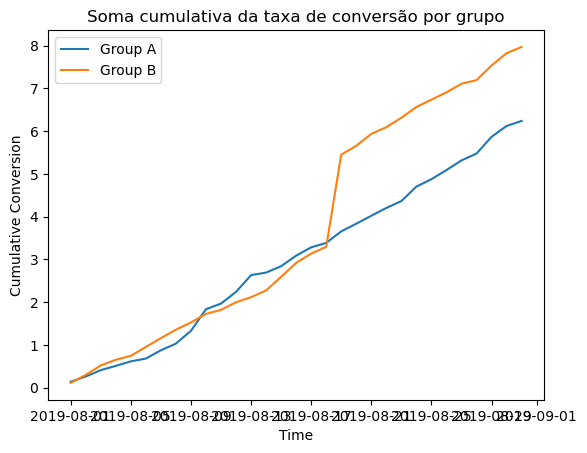

<Figure size 1000x500 with 0 Axes>

In [29]:
grouped_cum = grouped_df.groupby('date')[['cumulative_a', 'cumulative_b']].sum()
# Plotagem dos dados
grouped_cum=grouped_cum.reset_index()
plt.plot(grouped_cum['date'], grouped_cum['cumulative_a'], label='Group A')
plt.plot(grouped_cum['date'], grouped_cum['cumulative_b'], label='Group B')

# Adicionando legenda e rótulo dos eixos
plt.legend()
plt.title('Soma cumulativa da taxa de conversão por grupo')
plt.xlabel('Time')
plt.ylabel('Cumulative Conversion')
plt.figure(figsize=(10, 5))


plt.show()

#### Calculando os percentis para procurar valores atípicos.

In [30]:
pv_count['revenue'].quantile(0.95)

NameError: name 'pv_count' is not defined

In [ ]:
pv_count['revenue'].quantile(0.99)

In [ ]:
plt.scatter(df_o["date"], df_o["revenue"])


In [ ]:
df_o['revenue'].quantile(0.99)

In [ ]:
pv_count=df_o.pivot_table(index='visitorId', values='revenue', aggfunc='count')

#### Para encontrar a significância estatística da diferença na conversão entre os grupos usando os dados brutos, vou usar uma teste estatístico t Student para amostras independentes. Este teste comparará a média de conversões para cada grupo e determinará se a diferença entre as médias é estatisticamente significativa ou se pode ser explicada por acaso.

In [ ]:
# comparar as médias das duas amostras. A hipótese nula será que as médias são iguais, e a hipótese alternativa será que são diferentes. Para realizar o teste, você pode usar o teste t-Student.
group_a=grouped_cum['cumulative_a']
group_b=grouped_cum['cumulative_b']

In [ ]:
grouped_cum

In [ ]:
alpha = 0.05

results = st.shapiro(grouped_cum['cumulative_a'])
p_value = results[1]

print('p-value: ', p_value)

if p_value<alpha:
    print("Hipótese nula rejeitada: a distribuição não é normal")
else:
    print("Falha ao rejeitar a hipótese nula: a distribuição parece ser normal (A)")
    
results = st.shapiro(grouped_cum['cumulative_b'])
p_value = results[1]

print('p-value: ', p_value)

if p_value<alpha:
    print("Hipótese nula rejeitada: a distribuição não é normal")
else:
    print("Falha ao rejeitar a hipótese nula: a distribuição parece ser normal (B)")

Usando mannwhitneyu, mais aceito para distribuição não normais.

In [ ]:
results = st.mannwhitneyu( grouped_cum['cumulative_a'], grouped_cum['cumulative_b'], True, 'less')
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Hipótese nula rejeitada: a diferença possui significância estatística")
else:
    print("Falha a rejeitar a hipótese nula: não é possível chegar a conclusões sobre a diferença") 

## Agrupando pedidos para calcular o volume

In [ ]:
merged = grouped_orders.merge(grouped_visits, on=["date", 'group'])

In [ ]:
merged

In [ ]:
merged['volume']=merged['revenue']/merged['visits']

In [ ]:
merged=merged.reset_index()


Separando as populações para fazer teste estatístico.

In [ ]:
volume_a=merged.loc[merged['group']=='A', 'volume']
volume_b=merged.loc[merged['group']=='B', 'volume']

In [ ]:

results = st.shapiro(volume_a)
p_value = results[1]

print('p-value: ', p_value)


if p_value<alpha:
    print("Hipótese nula rejeitada: a distribuição não é normal")
else:
    print("Falha ao rejeitar a hipótese nula: a distribuição parece ser normal (A)")
    
results = st.shapiro(volume_b)
p_value = results[1]

print('p-value: ', p_value)

if p_value<alpha:
    print("Hipótese nula rejeitada: a distribuição não é normal")
else:
    print("Falha ao rejeitar a hipótese nula: a distribuição parece ser normal (B)")

Como as distribuições não são normais usaremos o teste U de Mann-Whitney:

In [ ]:
results = st.mannwhitneyu( volume_b, volume_a, True, 'less')

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Hipótese nula rejeitada: a diferença possui significância estatística")
else:
    print("Falha a rejeitar a hipótese nula: não é possível chegar a conclusões sobre a diferença") 

In [ ]:

merged = grouped_orders.merge(grouped_visits, on=["date", "group"])
merged=merged.reset_index()
# Calculando a taxa de volume
merged['volume']=merged['revenue']/merged['visits']
merged["cum_vol_b"] = merged.loc[merged["group"] == "B", "volume"].cumsum()
merged["cum_vol_a"] = merged.loc[merged["group"] == "A", "volume"].cumsum()
merged_vol = merged.groupby('date')[['cum_vol_a', 'cum_vol_b']].sum()
# Plotagem dos dados
merged_vol=merged_vol.reset_index()
plt.plot(merged_vol['date'], merged_vol['cum_vol_a'], label='Group A')
plt.plot(merged_vol['date'], merged_vol['cum_vol_b'], label='Group B')

# Adicionando legenda e rótulo dos eixos
plt.legend()
plt.title('Soma cumulativa do volume')
plt.xlabel('Time')
plt.ylabel('Cumulative Volume')

# Exibindo o gráfico
plt.show()

In [ ]:
# Gráfico de diferença relativa da conversão das duas populações:
plt.figure(figsize=(10, 5))
plt.title('Diferença relativa da conversão das duas populações')
plt.plot(grouped_cum['date'], grouped_cum['cumulative_b']/grouped_cum['cumulative_a']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')


In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(merged_vol['date'], merged_vol['cum_vol_b']/merged_vol['cum_vol_a']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('Diferença da soma do volume cumulativo')

## Filtrando amostra:

In [ ]:
df_o.describe()

In [ ]:
df_o=df_o[df_o['revenue']<1000] 

Filtrada com base no describe e percentis.

# Comparando amostras filtradas e não filtradas

### Plotando gráfico com dados antigos e novos

In [ ]:
grouped_cum = grouped_df.groupby('date')[['cumulative_a', 'cumulative_b']].sum()
grouped_cum=grouped_cum.reset_index()


In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(grouped_cum['date'], grouped_cum['cumulative_a'], label='Group A')
plt.plot(grouped_cum['date'], grouped_cum['cumulative_b'], label='Group B')

# Adicionando legenda e rótulo dos eixos

plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative Conversion')
plt.figure(figsize=(10, 5))


# Exibindo o gráfico
plt.show()
# Filtrando os dados e plotando novamente o gráfico
# junta os dois dataframes com base na coluna "date"
merged_df = pd.merge(df_o, df_v, on=["date", 'group'], how="left")
# agrupa o dataframe pela coluna "date" e "group"
grouped_df = merged_df.groupby(["date", "group"]).agg({"revenue": "sum", "visits": "sum", 'visitorId': 'nunique', 'transactionId':'nunique'})
# calcula a taxa de conversão para cada grupo
grouped_df["conversion"] = grouped_df["revenue"] / grouped_df["visits"]
# agrupa novamente pelo dia
grouped_df = grouped_df.reset_index().groupby(["date", 'group']).agg({"conversion": ["mean"]})

# renomeia a coluna de conversão para "mean_conversion"
grouped_df.columns = ["mean_conversion"]
# calcula a diferença relativa na conversão cumulativa para o grupo B
grouped_df=grouped_df.reset_index()
grouped_df["cumulative_b"] = grouped_df.loc[grouped_df["group"] == "B", "mean_conversion"].cumsum()
grouped_df["cumulative_a"] = grouped_df.loc[grouped_df["group"] == "A", "mean_conversion"].cumsum()
grouped_cum = grouped_df.groupby('date')[['cumulative_a', 'cumulative_b']].sum()
grouped_cum=grouped_cum.reset_index()
plt.figure(figsize=(10, 5))

plt.plot(grouped_cum['date'], grouped_cum['cumulative_a'], label='Group A')
plt.plot(grouped_cum['date'], grouped_cum['cumulative_b'], label='Group B')

# Adicionando legenda e rótulo dos eixos
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative Conversion Filtered')
plt.figure(figsize=(10, 5))


# Exibindo o gráfico
plt.show()

Pode-se observar, como o teste menciou, que os grupos de amostras não possuem diferença significativa entre as populações.

## Significância estatística da conversão filtrada.

In [ ]:
alpha = 0.05

results = st.shapiro(grouped_cum['cumulative_a'])
p_value = results[1]

print('p-value: ', p_value)

if p_value<alpha:
    print("Hipótese nula rejeitada: a distribuição não é normal")
else:
    print("Falha ao rejeitar a hipótese nula: a distribuição parece ser normal (A)")
    
results = st.shapiro(grouped_cum['cumulative_b'])
p_value = results[1]

print('p-value: ', p_value)

if p_value<alpha:
    print("Hipótese nula rejeitada: a distribuição não é normal")
else:
    print("Falha ao rejeitar a hipótese nula: a distribuição parece ser normal (B)")

### Se os dados são contínuos e as amostras seguem uma distribuição normal, o teste t-test pode ser apropriado. 

O T-test de Student é uma ferramenta estatística que compara a média de uma amostra a uma população ou a outra amostra para determinar se existe uma diferença significativa entre elas. Ele é usado para testar hipóteses sobre a média de uma população quando a variância populacional não é conhecida e a amostra é pequena (geralmente menor que 30). (Nesse caso 31)

O teste de T-Student assume que as amostras são distribuídas normalmente, o que pode ser verificado pelo uso de gráficos e testes estatísticos. O resultado do teste é expressado como um valor-t, que representa a diferença entre as médias de duas amostras em unidades de desvio padrão. Se o valor-t for suficientemente alto, a hipótese nula de que as médias são iguais é rejeitada e conclui-se que há uma diferença significativa entre as médias.

In [ ]:
t, p = stats.ttest_ind(group_a, group_b)

In [ ]:
alpha=.05

In [ ]:
if p < alpha:
    print("Rejeitamos a hipótese nula, logo as populações possuem médias de notas significativamente diferentes.")
else:
    print("Nós não podemos rejeitar a hipótese nula, logo, as populações do grupo A e do grupo B não diferem significativamente em suas razões cumulativas de receita por usuários.") 

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(merged_vol['date'], merged_vol['cum_vol_a'], label='Group A')
plt.plot(merged_vol['date'], merged_vol['cum_vol_b'], label='Group B')

# Adicionando legenda e rótulo dos eixos
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative Conversion')

# Exibindo o gráfico
plt.show()
#Atualizando tabela
merged['volume']=merged['revenue']/merged['visits']
merged["cum_vol_b"] = merged.loc[merged["group"] == "B", "volume"].cumsum()
merged["cum_vol_a"] = merged.loc[merged["group"] == "A", "volume"].cumsum()

merged_vol = merged.groupby('date')[['cum_vol_a', 'cum_vol_b']].sum()
# Plotagem dos dados
merged_vol=merged_vol.reset_index()
plt.figure(figsize=(10, 5))

plt.plot(merged_vol['date'], merged_vol['cum_vol_a'], label='Group A')
plt.plot(merged_vol['date'], merged_vol['cum_vol_b'], label='Group B')

# Adicionando legenda e rótulo dos eixos
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative Conversion')


In [ ]:
# Gráfico de diferença relativa:
plt.figure(figsize=(10, 5))

plt.plot(grouped_cum['date'], grouped_cum['cumulative_b']/grouped_cum['cumulative_a']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')


In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(merged_vol['date'], merged_vol['cum_vol_b']/merged_vol['cum_vol_a']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')


 Nesta tarefa, especificamente, precisamos verificar se o segundo conjunto de dados é maior e o primeiro menor, para podermos estabelecer o parâmetro como 'less'
 Como calculado anteriormente, a distribuição de dados não é normal, então usamos man withneyu para calcular a hipótese

In [ ]:
results = st.mannwhitneyu( merged_vol['cum_vol_a'], merged_vol['cum_vol_b'], True, 'less')

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Hipótese nula rejeitada: a diferença possui significância estatística")
else:
    print("Falha a rejeitar a hipótese nula: não é possível chegar a conclusões sobre a diferença") 

A escolha entre usar o t-test ou o Mann-Whitney U test depende das suposições sobre as distribuições de amostra e da natureza da comparação que você deseja fazer.

O t-test é usado quando se espera que as amostras sejam normalmente distribuídas e tenham variâncias homogêneas. Ele também pressupõe que as amostras são independentes entre si. Além disso, o t-test é apropriado para comparações entre médias.

Por outro lado, o Mann-Whitney U test é um teste não-paramétrico que não requer que as amostras sejam normalmente distribuídas ou tenham variâncias homogêneas. É apropriado para comparar as distribuições de duas amostras sem supor que as amostras sejam normalmente distribuídas.

Mann-Whitney U test pode ser uma opção mais apropriada.

# Conclusão

## Priorizando hipóteses

#### Após a realização da análise de dados e aplicação do método RICE, cheguei à conclusão de que adicionar um formulário de assinatura em todas as páginas da loja online é uma hipótese com potencial de impacto significativo na receita. O cálculo do RICE mostrou que a adição do formulário de assinatura é uma ação com um alto potencial de retorno sobre o investimento. Além disso, os dados coletados e analisados também apontam para uma tendência positiva na conversão dos usuários após a implantação do formulário.

## Testando hipóteses

### Qual dos grupos produz a maior receita?

- Pela análise dos gráficos filtrados, o gráfico de diferença média entre os grupos e o teste estatístico t-student apontou que não há uma diferença significativa entre as médias, em consonância com os novos gráficos. (Antes dos dados serem filtrados outro teste estatístico apontou uma hipótese contrária, em consonância com os antigos gráficos)

### Qual dos grupos tem o maior volume de venda?

- Pela análise dos gráficos filtrados, o gráfico de diferença média entre os grupos e o teste estatístico teste U de Mann-Whitney apontou que há uma diferença significativa entre as médias, assim como os gráficos provaram que a população B tem uma razão de receita por vendas maior. (Antes dos dados serem filtrados a conclusão foi a mesma)

# Qual grupo é mais vantajoso? 

- Pela análise feita, apesar do grupo B possuir um volume maior por compras, a receita dos dois não possui diferença significativa. Caso a empresa procure por um volume maior (por um motivo não financeiro, já que não gera mais lucro), ela deve focar no grupo B.